In [1]:
!nvcc --version
!nvidia-smi
!pip install ipython-autotime

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Tue Jan 11 10:30:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |            

In [2]:
import shutil
from IPython.display import Image, clear_output

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!git clone  'https://github.com/ultralytics/yolov5.git'
%cd yolov5
!pip install -qr 'requirements.txt'  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 10496, done.
remote: Total 10496 (delta 0), reused 0 (delta 0), pack-reused 10496
Receiving objects: 100% (10496/10496), 10.71 MiB | 25.80 MiB/s, done.
Resolving deltas: 100% (7248/7248), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 


In [6]:
## YOLO ##  
!ls "/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/pesos_transformacoes"

best_weights_dataset_artificial_base_pos_anotado.pt
best_weights_dataset_artificial_reduzido_pos_anotado.pt
best_weights_dataset_base_anotado.pt
best_weights_dataset_base_pos_anotado.pt
best_weights_dataset_reduzido_anotado.pt
best_weights_dataset_reduzido_map.pt
best_weights_dataset_reduzido_pos_anotacao.pt
best_weights_dataset_reduzido.pt
best_weights_dataset_reduzido_small.pt


In [ ]:
## COPY YAML FILE TO DRIVE ##

###################### train.yaml ###################################
# train: /content/gdrive/My Drive/Colab Notebooks/bcc/images/train
# val: /content/gdrive/My Drive/Colab Notebooks/bcc/images/valid
# nc: 1
# names: ['WF']
###################################################################


#shutil.copyfile("/content/train_modified.yaml", "/content/gdrive/My Drive/Colab Notebooks/yolo/dataset/train_modified.yaml")

In [ ]:
## TRAIN ## 

#--img 1296
#--multi-scale
#--noautoanchor
#--adam
#--cfg models/yolov5s.yaml
#--evolve
#--single-cls \

#--hyp data/hyp.finetune.yaml
#--hyp "/content/gdrive/My Drive/Colab Notebooks/yolo/best_parameters.yaml" \

#--data "/content/gdrive/My Drive/Colab Notebooks/yolo/dataset/data.yaml" \
#--data "/content/gdrive/My Drive/Colab Notebooks/yolo/dataset_aumentado/data.yaml" \

#--weights yolov5x.pt
#--weights runs/exp9_BCCM/weights/last.pt
#--weights "/content/gdrive/My Drive/Colab Notebooks/yolo/yolo_pest_best.pt"

!python train.py \
  --img 608 \
  --cache \
  --batch 8 \
  --epochs 500 \
  --data "/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/dataset_reduzido/data.yaml" \
  --hyp "/content/gdrive/My Drive/Colab Notebooks/yolo/best_parameters.yaml" \
  --cfg models/yolov5s.yaml \
  --weights yolov5s.pt \
  --name BCCM \



github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v4.0-178-g877b826 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=True, cfg='models/yolov5s.yaml', data='/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/dataset_reduzido/data.yaml', device='', entity=None, epochs=500, evolve=False, exist_ok=False, global_rank=-1, hyp='/content/gdrive/My Drive/Colab Notebooks/yolo/best_parameters.yaml', image_weights=False, img_size=[608, 608], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='BCCM', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/BCCM6', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/t

In [ ]:
## TEST IMAGE LABELS ##
#Image(filename='/content/runs/exp11_BCCM/test_batch0_gt.jpg', width=10000) 

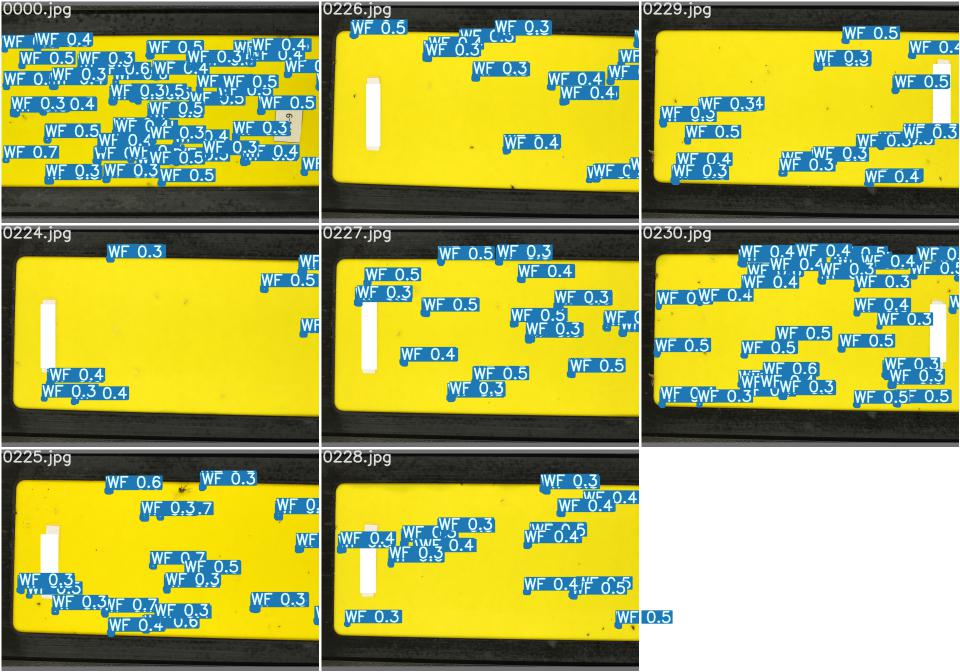

In [ ]:
## TEST IMAGE PREDICITONS ##
Image(filename='/content/runs/exp12_BCCM/test_batch0_pred.jpg', width=10000)

In [ ]:
## TEST ## 

#--data "/content/gdrive/My Drive/Colab Notebooks/yolo/dataset/data.yaml" \
#--data "/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/best_weights_dataset_background.pt" \
#--data "/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/dataset_reduzido/data.yaml" \

#--weights runs/exp9_BCCM/weights/last.pt
#--weights "/content/gdrive/My Drive/Colab Notebooks/yolo/yolo_pest_best.pt"
#--weights "/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/pesos_transformacoes/best_weights_dataset_reduzido.pt" \
#--batch_size 8 
#--conf-thres 0.001
#--iou-thres 0.6

!python test.py \
  --img 608 \
  --data "/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/dataset_reduzido/data.yaml" \
  --weights "/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/pesos_transformacoes/best_weights_dataset_reduzido_small.pt" \
  --save-txt \



Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/dataset_reduzido/data.yaml', device='', exist_ok=False, img_size=608, iou_thres=0.6, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/pesos_transformacoes/best_weights_dataset_reduzido_small.pt'])
YOLOv5 🚀 v4.0-180-g1148e2e torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
val: Scanning '/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/dataset_reduzido/labels/valid.cache' images and labels... 30 found, 0 missing, 0 empty, 0 corrupted: 100% 30/30 [00:00<00:00, 268292.37it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 1

In [ ]:
%load_ext autotime

!python detect.py \
  --img 608 \
  --source "/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/1001_reduzida_e_comprimida.jpg" \
  --weights "/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/pesos_transformacoes/best_weights_dataset_reduzido_small.pt" \
  --save-txt \


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
detect: weights=['/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/pesos_transformacoes/best_weights_dataset_reduzido_small.pt'], source=/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/1001_reduzida_e_comprimida.jpg, imgsz=[608, 608], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-84-gdef7a0f torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients
image 1/1 /content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/1001_reduzida_e_comprimida.jpg: 512x608 39 WFs, Done. (0.089s)
Speed

In [ ]:
!zip -r runs/output7 runs/detect/exp3/

  adding: runs/detect/exp3/ (stored 0%)
  adding: runs/detect/exp3/labels/ (stored 0%)
  adding: runs/detect/exp3/labels/1244.txt (deflated 61%)
  adding: runs/detect/exp3/1244.jpg (deflated 21%)
time: 172 ms (started: 2021-11-02 18:37:15 +00:00)


# Comparação entre anotações reais e previstas

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

import os, sys, random, shutil
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
from matplotlib import patches
from matplotlib import image
from matplotlib import pyplot
import numpy as np

from sklearn.cluster import KMeans
import seaborn as sns
import cv2

import warnings
warnings.filterwarnings('ignore')

time: 799 ms (started: 2021-11-11 21:49:51 +00:00)


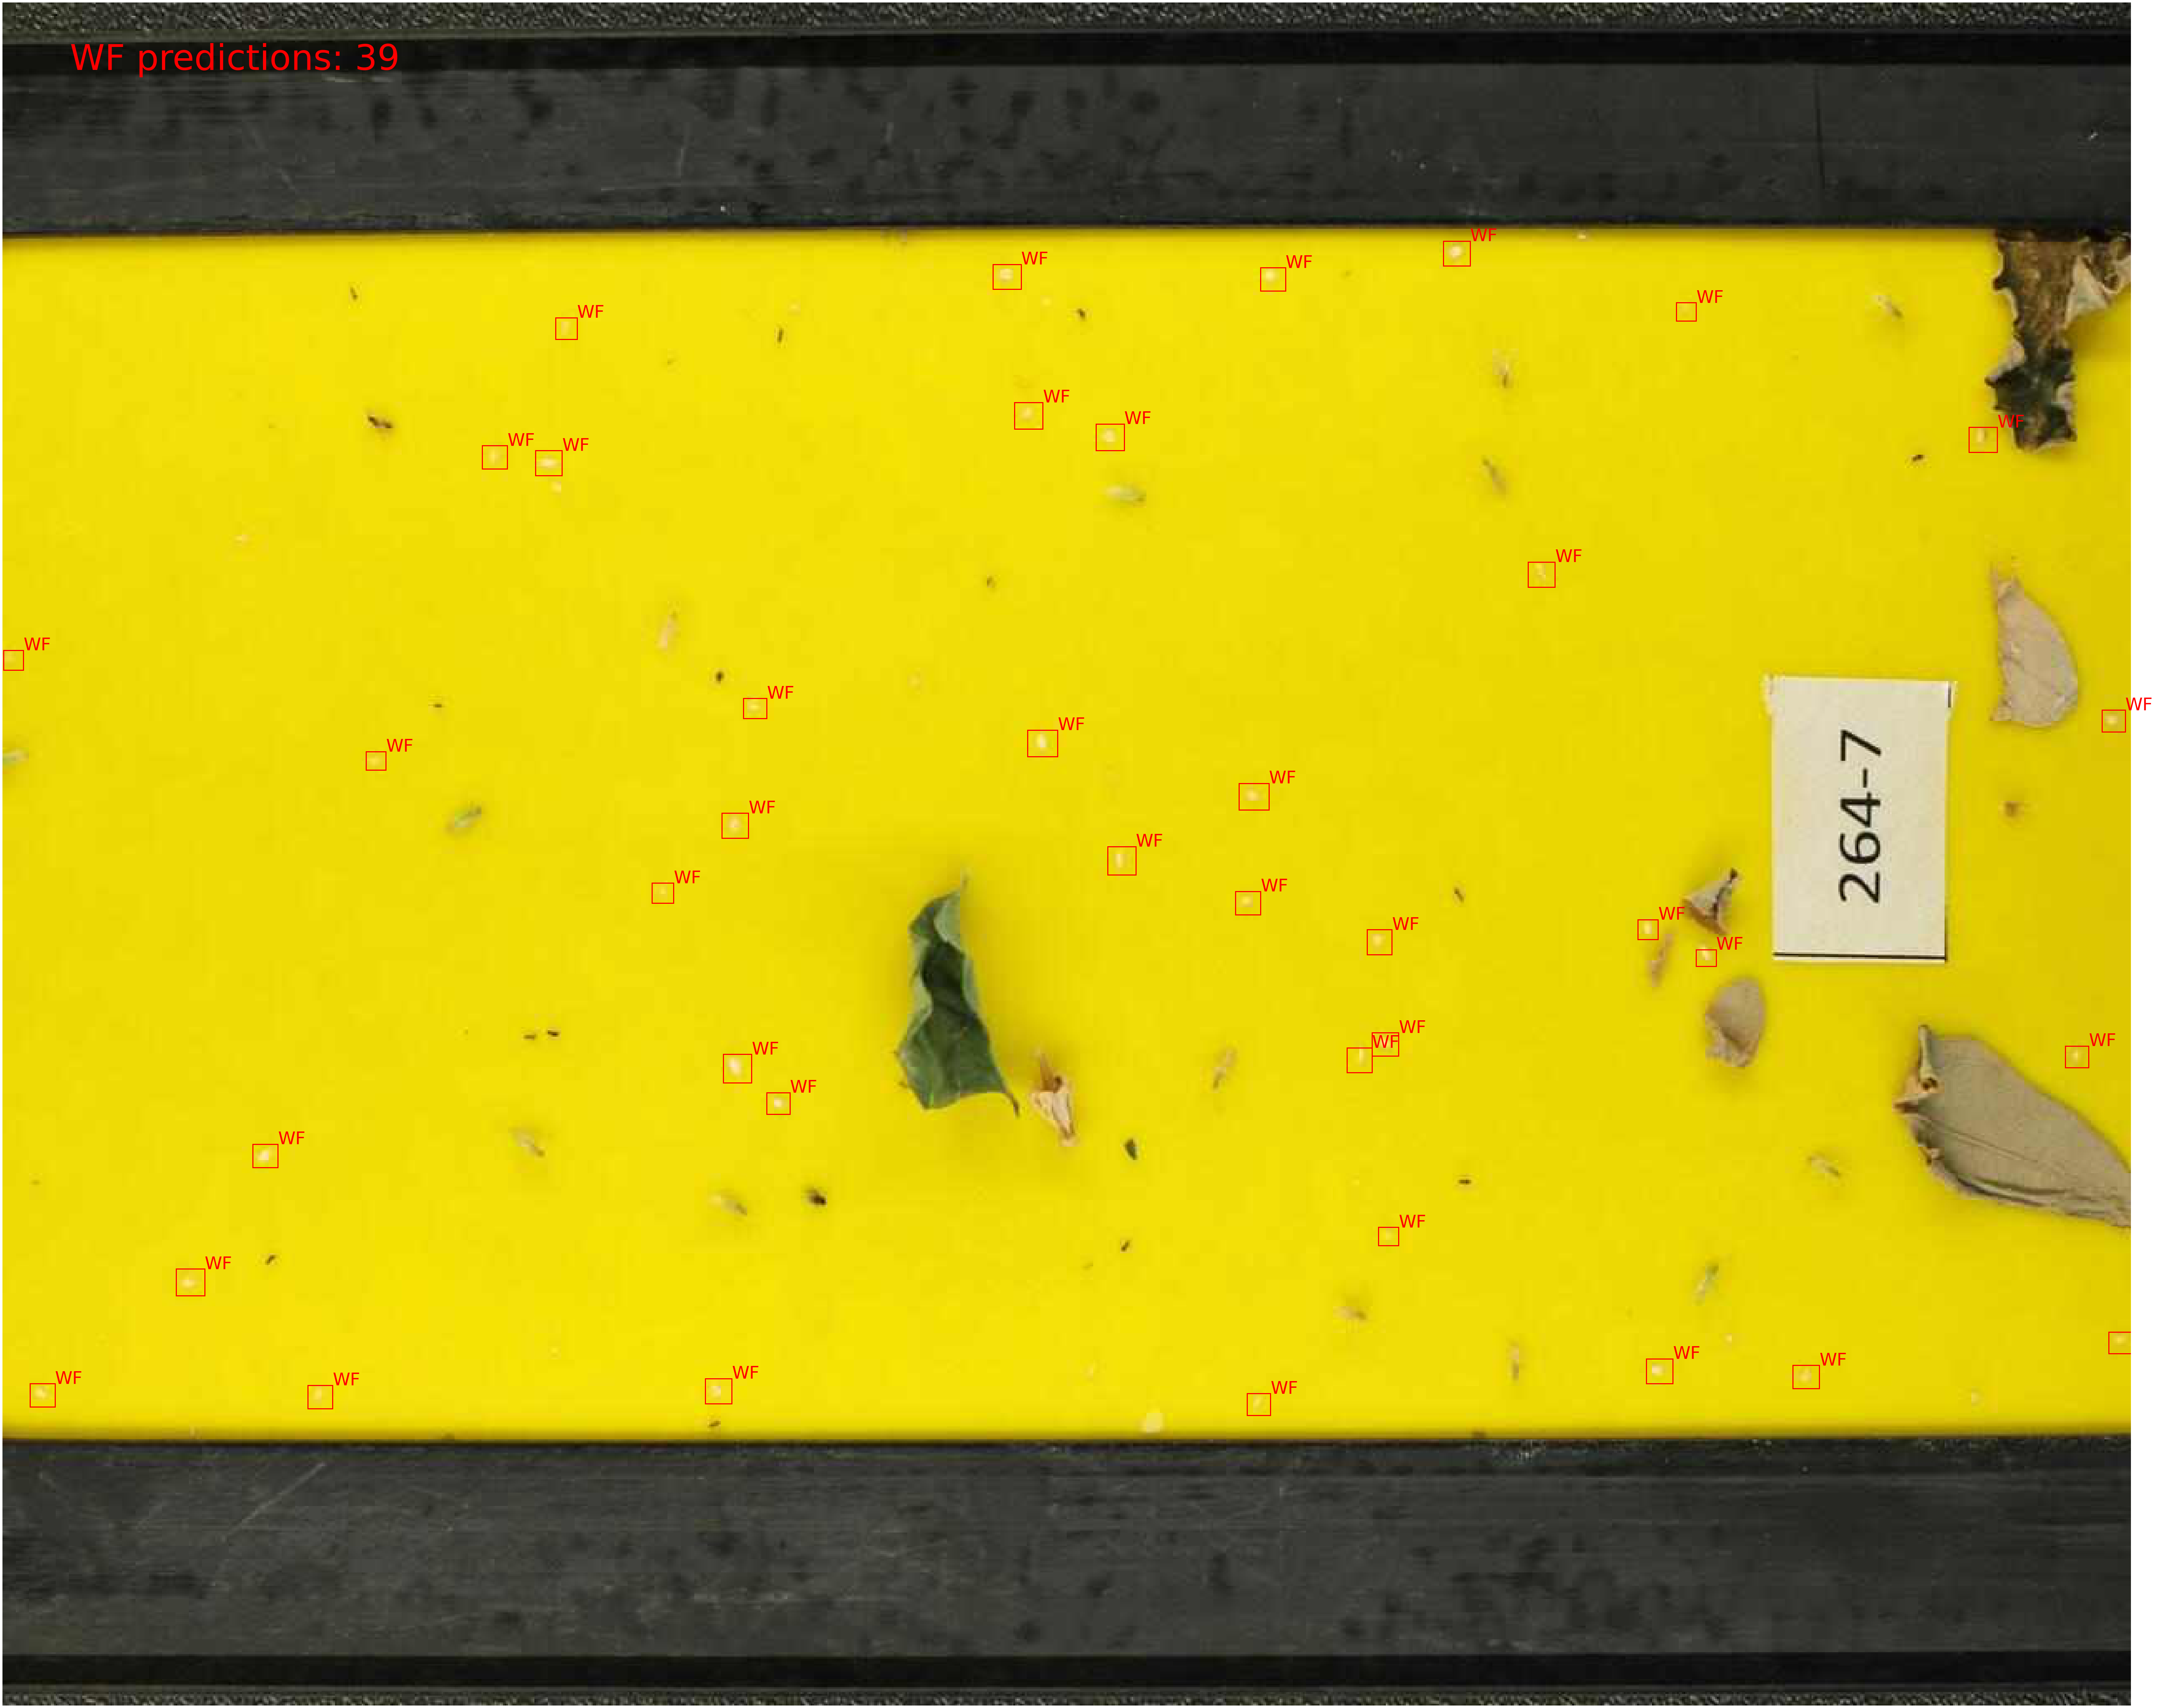

time: 18.9 s (started: 2021-11-11 22:02:32 +00:00)


In [ ]:
# Plotting bbox ffrom the .txt file output from yolo #

############################################# predict ################################################################## 

## Provide the location of the output .txt file ##)
a_file = open("runs/detect/exp4/labels/1001_reduzida_e_comprimida.txt", "r")

# Stripping data from the txt file into a list #
list_of_lists = []
for line in a_file:
  stripped_line = line.strip()
  line_list = stripped_line.split()
  list_of_lists.append(line_list)
a_file.close()

# Conversion of str to int #
stage1 = []
for i in range(0, len(list_of_lists)):
  test_list = list(map(float, list_of_lists[i])) 
  stage1.append(test_list)

# Denormalizing # 
stage2 = []
mul = [1,5184,3456,5184,3456] #[constant, image_width, image_height, image_width, image_height]
#mul = [1,1280,1024,1280,1024]
for x in stage1:
  c,xx,yy,w,h = x[0]*mul[0], x[1]*mul[1], x[2]*mul[2], x[3]*mul[3], x[4]*mul[4]    
  stage2.append([c,xx,yy,w,h])

# Convert (x_center, y_center, width, height) --> (x_min, y_min, width, height) #
stage_final = []
for x in stage2:
  c,xx,yy,w,h = x[0]*1, (x[1]-(x[3]/2)) , (x[2]-(x[4]/2)), x[3]*1, x[4]*1  
  stage_final.append([c,xx,yy,w,h])

fig = plt.figure(figsize = (100,67))

import cv2
#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
############################

## Location of the input image which is sent to model's prediction ##
image = plt.imread('/content/gdrive/My Drive/Colab Notebooks/yolo/datasets/datasets_transformacoes/1001_reduzida_e_comprimida.jpg')
plt.axis('off')
plt.imshow(image)


###################

count_pred=0

boxes_p = pd.DataFrame(columns=["xmin_p","xmax_p","ymin_p","ymax_p","intersection"])

# iterating over the image for different objects
for x in stage_final:
  class_ = int(x[0])
  xmin = x[1]
  ymin = x[2]
  width = x[3]
  height = x[4]
  xmax = width + xmin
  ymax = height + ymin

  count_pred = count_pred+1

  boxes_p= boxes_p.append({"xmin_p":xmin,"xmax_p":xmax,"ymin_p":ymin,"ymax_p":ymax,"intersection":0},ignore_index=True)

  # assign different color to different classes of objects
  if class_ == 0:
    edgecolor = 'r'
    ax.annotate('WF', xy=(xmax,ymin),size=50,color='r')

  # add bounding boxes to the image
  rect_p = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none',linewidth=3)
  ax.add_patch(rect_p)

#ax.annotate('WF predictions: {wf}'.format(wf=count_pred), xy=(100,240),size=100,color='r')

################################################################# actual ############################################3
'''
annotations = sorted(glob("/content/gdrive/My Drive/Colab Notebooks/dataset_base_xml/anotacoes/1244.xml"))

for file in annotations:
  prev_filename = file.split('/')[-1].split('.')[-2] + '.jpg'
  parsedXML = ET.parse(file)

  boxes_a = pd.DataFrame(columns=["xmin_a","xmax_a","ymin_a","ymax_a"])

  count_annot=0
  for node in parsedXML.getroot().iter('object'):
    xmin = int(node.find('bndbox/xmin').text)
    xmax = int(node.find('bndbox/xmax').text)
    ymin = int(node.find('bndbox/ymin').text)
    ymax = int(node.find('bndbox/ymax').text)
    width = xmax-xmin
    hight = ymax-ymin

    count_annot = count_annot+1

    boxes_a = boxes_a.append({"xmin_a":xmin,"xmax_a":xmax,"ymin_a":ymin,"ymax_a":ymax},ignore_index=True)

    ax.annotate('A', xy=(xmin,ymin),size=15,color='g')
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'g', facecolor = 'none',linewidth=3)
    
    ax.add_patch(rect)


counter=[]
for j in range(0,len(boxes_p)):
  count_inter = 0
  for i in range (0,len(boxes_a)):
    if (boxes_a["xmin_a"][i] > boxes_p["xmax_p"][j] or boxes_a["xmax_a"][i] < boxes_p["xmin_p"][j]) or (boxes_a["ymin_a"][i] > boxes_p["ymax_p"][j] or boxes_a["ymax_a"][i] < boxes_p["ymin_p"][j]):
      count_inter += 0
    else:
      count_inter += 1
    if count_inter > 1:
      count_inter =1

  counter.append(count_inter)
  intersection = sum(counter)
  new_predictions=len(boxes_p)-sum(counter)

if intersection > len(boxes_a):
  intersection = len(boxes_a)
'''

#ax.annotate('WF annotations: {wf}'.format(wf=count_annot), xy=(100,140),size=100,color='g')
ax.annotate('WF predictions: {wf}'.format(wf=count_pred) , xy=(100,240),size=100,color='r')
#ax.annotate('WF predictions: {wf} [intersection with annotations: {inter} + new predictions: {new}]'.format(wf=count_pred,inter=intersection, new=new_predictions), xy=(100,240),size=100,color='r')

#print('WF annotations: {wf}'.format(wf=count_annot))
#print('WF predictions: {wf} [intersection with annotations: {inter} + new predictions: {new}]'.format(wf=count_pred,inter=intersection, new=new_predictions))

#################
plt.savefig("/content/gdrive/My Drive/Colab Notebooks/yolo/1001_reduzida_e_comprimida.png",dpi=100)

# Nova secção

In [84]:
!python "/content/gdrive/My Drive/Colab Notebooks/yolo/app/detect_count.py" \
  --img 608 \
  --source "/content/gdrive/My Drive/Colab Notebooks/imagens_comprimidas/xga/45kb" \
  --weights "/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/pesos_transformacoes/best_weights_dataset_reduzido_pos_anotacao.pt" \

#  --save-txt \

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=608, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/gdrive/My Drive/Colab Notebooks/imagens_comprimidas/xga/45kb', update=False, view_img=False, weights=['/content/gdrive/My Drive/Colab Notebooks/yolo/pesos/pesos_transformacoes/best_weights_dataset_reduzido_pos_anotacao.pt'])
YOLOv5 v6.0-186-gb3eaf50 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
image 1/30 /content/gdrive/My Drive/Colab Notebooks/imagens_comprimidas/xga

In [85]:
 !zip -r cif_5kb.zip "/content/yolov5/runs/detect/exp33" 

  adding: content/yolov5/runs/detect/exp33/ (stored 0%)
  adding: content/yolov5/runs/detect/exp33/1271.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp33/1247.jpg (deflated 6%)
  adding: content/yolov5/runs/detect/exp33/1258.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp33/1257.jpg (deflated 5%)
  adding: content/yolov5/runs/detect/exp33/1270.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp33/1272.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp33/1262.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp33/1260.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp33/1279.jpg (deflated 9%)
  adding: content/yolov5/runs/detect/exp33/1255.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp33/1278.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp33/1264.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp33/1274.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp33/1245.jpg (deflated 8%)
  adding: content/yo